In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('../DATA/laptops_pricing.csv', encoding='latin-1', index_col = 'laptop_ID')

In [3]:
selected_features = ('Apple', 'HP', 'Acer', 'Dell', 'Lenovo', 'Asus')
df = df[df['Company'].isin(selected_features)]

In [4]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00


In [5]:
df['Weight'] = df['Weight'].str.replace('kg','')
df['Weight'] = df['Weight'].astype("float")

In [6]:
df['Price_euros'] = df['Price_euros'].astype(int)

In [7]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229


In [8]:
df.drop("Product", axis = 1, inplace = False)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803
...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638
1317,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499
1318,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229


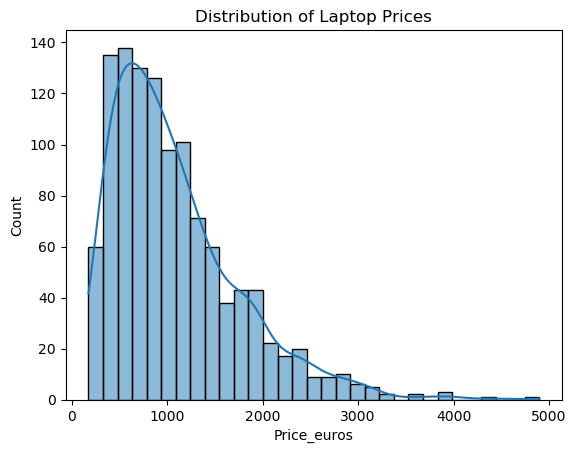

In [9]:
sns.histplot(df['Price_euros'], kde=True)
plt.title('Distribution of Laptop Prices')
plt.show()

In [10]:
df.Price_euros.value_counts()

1099    16
1499    12
899     11
999     10
1299    10
        ..
1841     1
1154     1
1858     1
759      1
911      1
Name: Price_euros, Length: 632, dtype: int64

In [10]:
df.Price_euros.mean()

1077.5773913043479

In [11]:
df.Price_euros.median()

909.5

In [11]:
df.Price_euros.max()

4899

In [12]:
df.Price_euros.min()

174

In [13]:
df.Price_euros.describe()

count    1150.000000
mean     1077.577391
std       666.417495
min       174.000000
25%       582.000000
50%       909.500000
75%      1398.750000
max      4899.000000
Name: Price_euros, dtype: float64

In [14]:
df.Company.value_counts()

Dell      297
Lenovo    297
HP        274
Asus      158
Acer      103
Apple      21
Name: Company, dtype: int64

In [15]:
df.groupby(['Company' , 'Price_euros']).size()

Company  Price_euros
Acer     174            1
         199            1
         209            1
         269            1
         272            1
                       ..
Lenovo   2968           1
         2999           1
         3240           1
         3299           1
         4899           1
Length: 909, dtype: int64

In [16]:
quartile = df[df['Company'] == 'Acer']['Price_euros'].quantile([0,0.25,0.5,0.75,1])

In [17]:
quartile

0.00     174.0
0.25     385.5
0.50     559.0
0.75     774.5
1.00    2599.0
Name: Price_euros, dtype: float64

In [18]:
quartile1 = df[df['Company'] == 'Asus']['Price_euros'].quantile([0,0.25,0.5,0.75,1])

In [19]:
quartile1

0.00     191.00
0.25     537.25
0.50    1012.50
0.75    1488.25
1.00    3975.00
Name: Price_euros, dtype: float64

In [20]:
quartile2 = df[df['Company'] == 'HP']['Price_euros'].quantile([0,0.25,0.5,0.75,1])

In [21]:
quartile2

0.00     209.00
0.25     615.75
0.50     966.50
0.75    1389.00
1.00    4389.00
Name: Price_euros, dtype: float64

In [22]:
quartile3 = df[df['Company'] == 'Apple']['Price_euros'].quantile([0,0.25,0.5,0.75,1])

In [23]:
quartile3

0.00     898.0
0.25    1163.0
0.50    1339.0
0.75    1958.0
1.00    2858.0
Name: Price_euros, dtype: float64

In [24]:
quartile4 = df[df['Company'] == 'Dell']['Price_euros'].quantile([0,0.25,0.5,0.75,1])

In [25]:
quartile4

0.00     274.0
0.25     735.0
0.50     985.0
0.75    1472.0
1.00    3659.0
Name: Price_euros, dtype: float64

In [26]:
quartile5 = df[df['Company'] == 'Lenovo']['Price_euros'].quantile([0,0.25,0.5,0.75,1])

In [27]:
quartile5

0.00     229.0
0.25     549.0
0.50     899.0
0.75    1488.0
1.00    4899.0
Name: Price_euros, dtype: float64

In [28]:
df[(df['Company'] == 'Apple') & (df['Price_euros'])]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803
7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139
13,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,AMD Radeon Pro 555,macOS,1.83,2439
27,Apple,MacBook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.6GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35,1099
46,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.0GHz,8GB,256GB SSD,Intel Iris Graphics 540,macOS,1.37,1419
803,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8GB,512GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.92,1165
1211,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8GB,256GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.92,1163


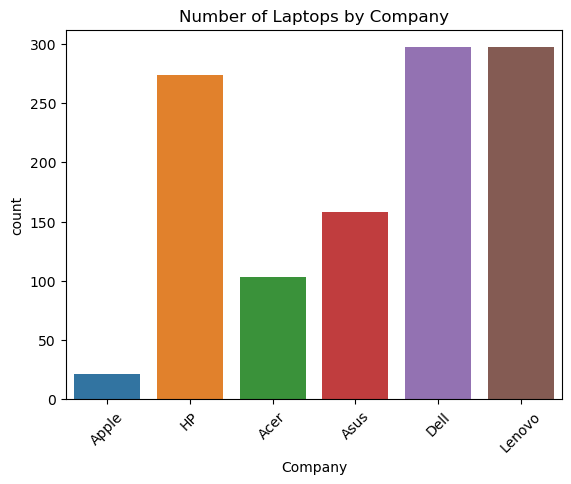

In [11]:
sns.countplot(data=df, x='Company')
plt.title('Number of Laptops by Company')
plt.xticks(rotation=45)
plt.show()

In [30]:
df.Company.value_counts()

Dell      297
Lenovo    297
HP        274
Asus      158
Acer      103
Apple      21
Name: Company, dtype: int64

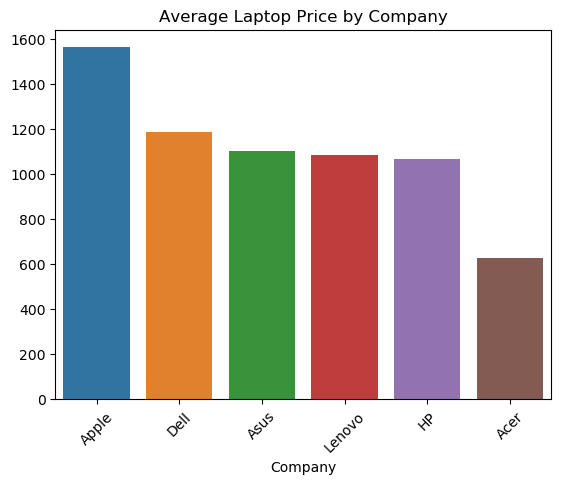

In [12]:
avg_price_by_company = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values)
plt.title('Average Laptop Price by Company')
plt.xticks(rotation=45)
plt.show()

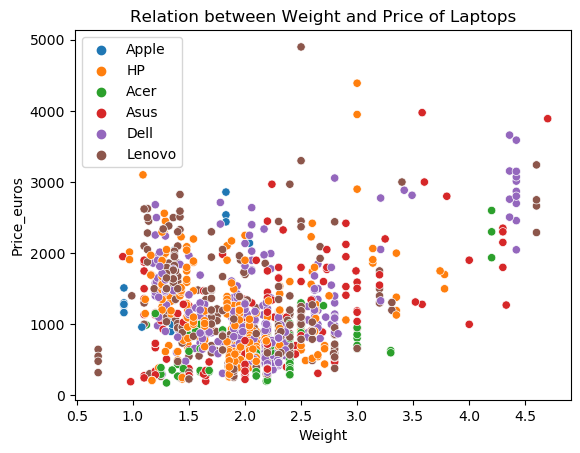

In [13]:
sns.scatterplot(data=df, x='Weight', y='Price_euros', hue='Company')
plt.legend(loc='best') 
plt.title('Relation between Weight and Price of Laptops')
plt.show()

In [33]:
df['Weight'].mean()

2.0502278260869566

In [34]:
df['Weight'].describe()

count    1150.000000
mean        2.050228
std         0.647784
min         0.690000
25%         1.582500
50%         2.050000
75%         2.300000
max         4.700000
Name: Weight, dtype: float64

In [35]:
df.groupby(['Weight', 'Price_euros']).size()

Weight  Price_euros
0.69    319            1
        479            1
        549            1
        646            1
0.91    1950           1
                      ..
4.60    2289           1
        2663           1
        2749           1
        3240           1
4.70    3890           1
Length: 1074, dtype: int64

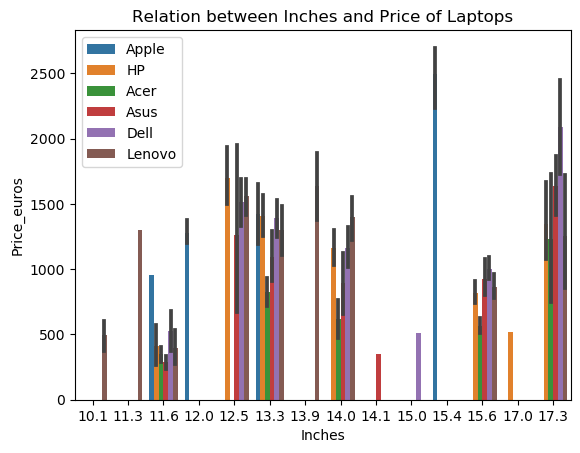

In [36]:
sns.barplot(data=df, x='Inches', y='Price_euros', hue='Company')
plt.legend(loc='best') 
plt.title('Relation between Inches and Price of Laptops')
plt.show()

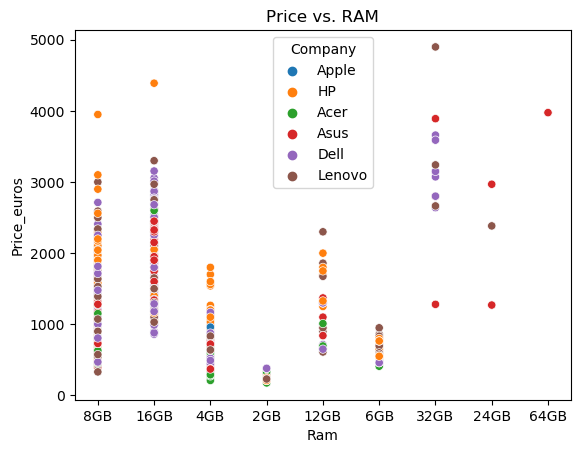

In [37]:
sns.scatterplot(x='Ram', y='Price_euros', hue='Company', data=df)
plt.title("Price vs. RAM")
plt.show()

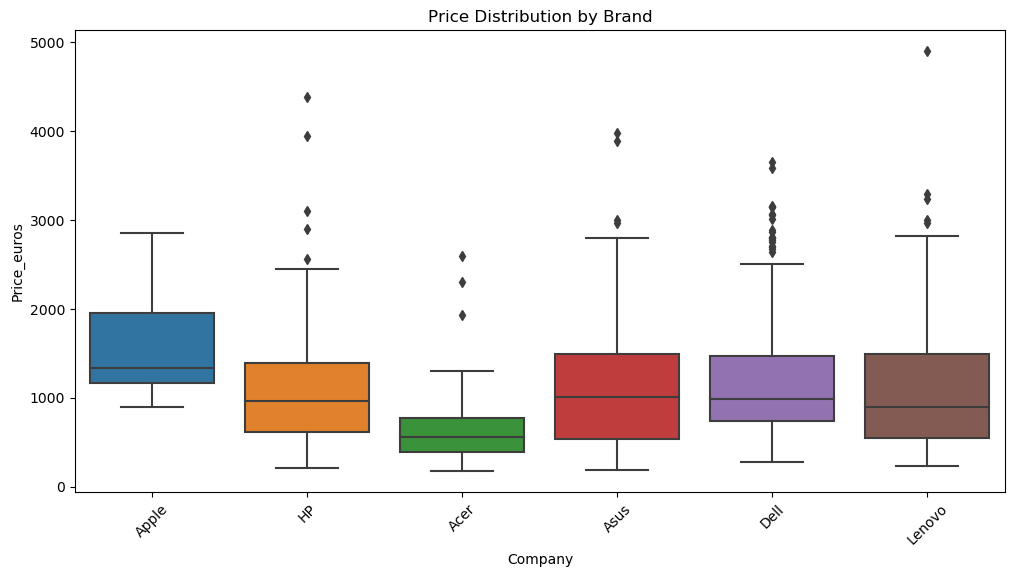

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.title("Price Distribution by Brand")
plt.xticks(rotation=45)
plt.show()

In [14]:
df=pd.concat([df,pd.get_dummies(df['Company'],prefix="company")],axis=1)
df=df.drop('Company',axis=1)
df.head(1)

,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,company_Dell,company_HP,company_Lenovo
laptop_ID,,,,,,,,,,,,,,,,,
1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,1,0,0,0,0


In [15]:
df['TypeName'].value_counts()

Notebook              672
Ultrabook             161
Gaming                146
2 in 1 Convertible    118
Workstation            29
Netbook                24
Name: TypeName, dtype: int64

In [16]:
df=pd.concat([df,pd.get_dummies(df["TypeName"],prefix='typename')],axis=1)
df=df.drop("TypeName",axis=1)
df.head(1)

,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,company_Asus,company_Dell,company_HP,company_Lenovo,typename_2 in 1 Convertible,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,...,0,0,0,0,0,0,0,0,1,0


In [17]:
df['ScreenResolution']=df['ScreenResolution'].str.split(' ').apply(lambda x:x[-1])
df['screen_width']=df['ScreenResolution'].str.split('x').apply(lambda x:int(x[0]))
df['screen_height']=df['ScreenResolution'].str.split('x').apply(lambda x: int(x[1]))
df=df.drop('ScreenResolution',axis=1)
df.head(1)

,Product,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,...,company_HP,company_Lenovo,typename_2 in 1 Convertible,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,MacBook Pro,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,...,0,0,0,0,0,0,1,0,2560,1600


In [18]:
df['cpu_company']=df['Cpu'].str.split(' ').apply(lambda x:x[0])
df['cpu_speed']=df['Cpu'].str.split(' ').apply(lambda x:x[-1])
df=df.drop('Cpu',axis=1)
df.head(1)

,Product,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,...,typename_2 in 1 Convertible,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height,cpu_company,cpu_speed
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,MacBook Pro,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3GHz


In [14]:
df['cpu_company'].value_counts()

Intel    1088
AMD        62
Name: cpu_company, dtype: int64

In [19]:
pd.get_dummies(df['cpu_company'],prefix='cpu_company')

,cpu_company_AMD,cpu_company_Intel
laptop_ID,,
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
1316,0,1
1317,0,1
1318,0,1


In [20]:
df=pd.concat([df,pd.get_dummies(df['cpu_company'],prefix='cpu_company')],axis=1)
df=df.drop('cpu_company',axis=1)
df.head(1)

,Product,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,...,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height,cpu_speed,cpu_company_AMD,cpu_company_Intel
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,MacBook Pro,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,1,...,0,0,0,1,0,2560,1600,2.3GHz,0,1


In [21]:
df['cpu_speed']=df['cpu_speed'].apply(lambda x:float(x[:-3]))
df.head(1)

,Product,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,...,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height,cpu_speed,cpu_company_AMD,cpu_company_Intel
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,MacBook Pro,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,1,...,0,0,0,1,0,2560,1600,2.3,0,1


In [22]:
df['Ram'].value_counts()

8GB     554
4GB     345
16GB    149
6GB      40
12GB     25
2GB      20
32GB     13
24GB      3
64GB      1
Name: Ram, dtype: int64

In [23]:
df['Ram']=df['Ram'].apply(lambda x:int(x[:-2]))
df.head(1)

,Product,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,...,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height,cpu_speed,cpu_company_AMD,cpu_company_Intel
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,MacBook Pro,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,1,...,0,0,0,1,0,2560,1600,2.3,0,1


In [20]:
df['Memory'].value_counts()

256GB SSD                        366
1TB HDD                          221
500GB HDD                        123
512GB SSD                        101
128GB SSD +  1TB HDD              75
128GB SSD                         64
256GB SSD +  1TB HDD              51
32GB Flash Storage                31
2TB HDD                           16
64GB Flash Storage                12
1TB SSD                           12
512GB SSD +  1TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
256GB SSD +  2TB HDD               7
16GB Flash Storage                 6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
32GB SSD                           2
256GB SSD +  256GB SSD             2
512GB SSD +  512GB SSD             1
5

In [24]:
def func(x,type:str):
    lis=[]
    x=x.split('+')
    for storage in x:
        temp=storage.split(' ')
        for i in range(len(temp)):
            if temp[i]==type:
                return temp[i-1]
    return "0GB"
df['memory_ssd']=df['Memory'].apply(func,args=['SSD'])
df['memory_hdd']=df['Memory'].apply(func,args=['HDD'])
df['memory_flash']=df['Memory'].apply(func,args=['Flash'])
df['memory_hybrid']=df['Memory'].apply(func,args=['Hybrid'])

In [25]:
def func(x):
    if x[-2:]=='TB':
        return float(x[:-2])*1024
    else:
        return float(x[:-2])
for memory_type in ['memory_ssd','memory_hdd','memory_flash','memory_hybrid']:
    df[memory_type]=df[memory_type].apply(func)
df=df.drop('Memory',axis=1)
df.head(1)

,Product,Inches,Ram,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,...,typename_Workstation,screen_width,screen_height,cpu_speed,cpu_company_AMD,cpu_company_Intel,memory_ssd,memory_hdd,memory_flash,memory_hybrid
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,MacBook Pro,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,1,0,...,0,2560,1600,2.3,0,1,128.0,0.0,0.0,0.0


In [26]:
df['Gpu']=df['Gpu'].str.split(' ').apply(lambda x:x[0])
df['Gpu'].value_counts()

Intel     642
Nvidia    329
AMD       179
Name: Gpu, dtype: int64

In [27]:
df=pd.concat([df,pd.get_dummies(df['Gpu'],prefix='gpu')],axis=1)
df=df.drop('Gpu',axis=1)
df.head(1)

,Product,Inches,Ram,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,company_Dell,...,cpu_speed,cpu_company_AMD,cpu_company_Intel,memory_ssd,memory_hdd,memory_flash,memory_hybrid,gpu_AMD,gpu_Intel,gpu_Nvidia
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,MacBook Pro,13.3,8,macOS,1.37,1339,0,1,0,0,...,2.3,0,1,128.0,0.0,0.0,0.0,0,1,0


In [28]:
df=pd.concat([df,pd.get_dummies(df['OpSys'],prefix='opsys')],axis=1)
df=df.drop('OpSys',axis=1)
df.head(1)

,Product,Inches,Ram,Weight,Price_euros,company_Acer,company_Apple,company_Asus,company_Dell,company_HP,...,gpu_Nvidia,opsys_Android,opsys_Chrome OS,opsys_Linux,opsys_Mac OS X,opsys_No OS,opsys_Windows 10,opsys_Windows 10 S,opsys_Windows 7,opsys_macOS
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,MacBook Pro,13.3,8,1.37,1339,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
df.columns

Index(['Product', 'Inches', 'Ram', 'Weight', 'Price_euros', 'company_Acer',
       'company_Apple', 'company_Asus', 'company_Dell', 'company_HP',
       'company_Lenovo', 'typename_2 in 1 Convertible', 'typename_Gaming',
       'typename_Netbook', 'typename_Notebook', 'typename_Ultrabook',
       'typename_Workstation', 'screen_width', 'screen_height', 'cpu_speed',
       'cpu_company_AMD', 'cpu_company_Intel', 'memory_ssd', 'memory_hdd',
       'memory_flash', 'memory_hybrid', 'gpu_AMD', 'gpu_Intel', 'gpu_Nvidia',
       'opsys_Android', 'opsys_Chrome OS', 'opsys_Linux', 'opsys_Mac OS X',
       'opsys_No OS', 'opsys_Windows 10', 'opsys_Windows 10 S',
       'opsys_Windows 7', 'opsys_macOS'],
      dtype='object')

In [30]:
df.dtypes

Product                         object
Inches                         float64
Ram                              int64
Weight                         float64
Price_euros                      int32
company_Acer                     uint8
company_Apple                    uint8
company_Asus                     uint8
company_Dell                     uint8
company_HP                       uint8
company_Lenovo                   uint8
typename_2 in 1 Convertible      uint8
typename_Gaming                  uint8
typename_Netbook                 uint8
typename_Notebook                uint8
typename_Ultrabook               uint8
typename_Workstation             uint8
screen_width                     int64
screen_height                    int64
cpu_speed                      float64
cpu_company_AMD                  uint8
cpu_company_Intel                uint8
memory_ssd                     float64
memory_hdd                     float64
memory_flash                   float64
memory_hybrid            

In [31]:
import seaborn as sns
from matplotlib import pyplot as plt

[]

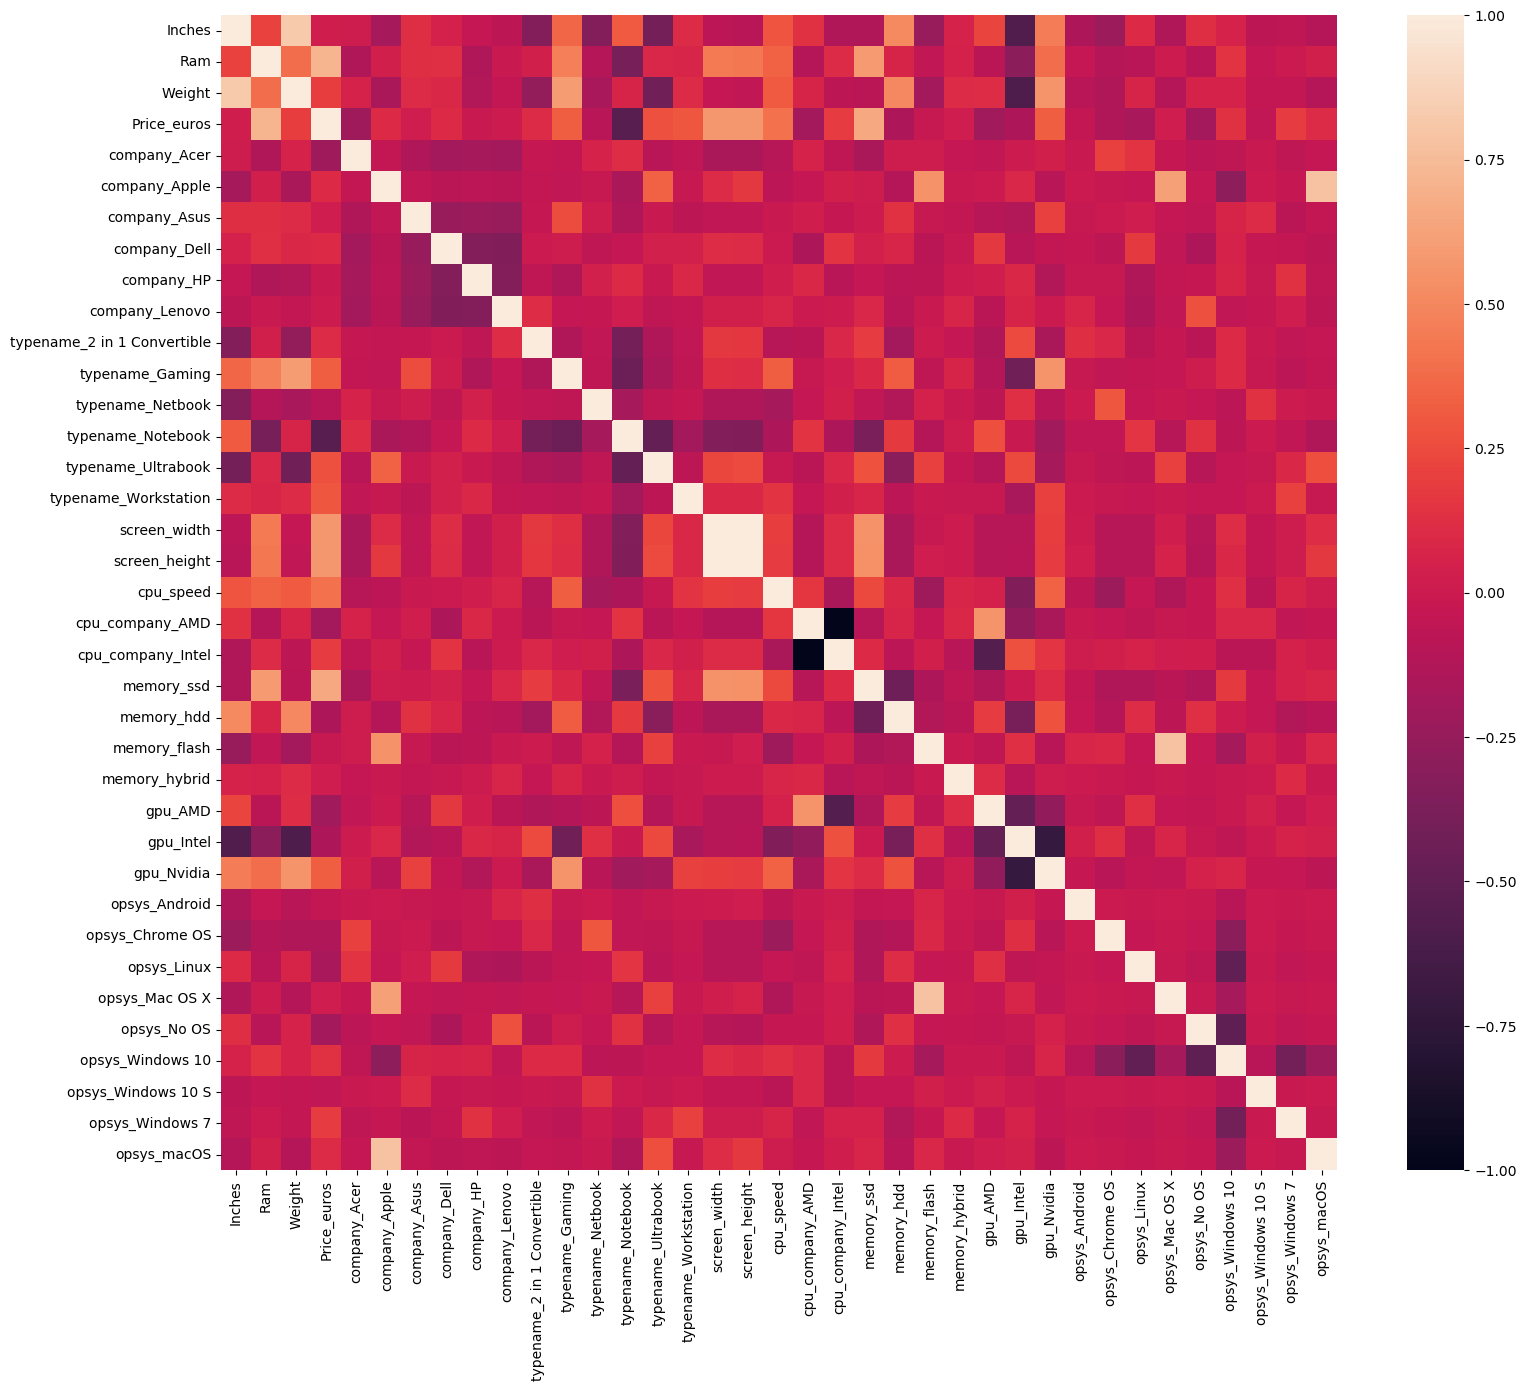

In [32]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=False)
plt.plot()

In [33]:
max_corr=df.corr()['Price_euros'].apply(lambda x:abs(x)).sort_values(ascending=False,axis=0)
max_corr.iloc[:25]

Price_euros                    1.000000
Ram                            0.716222
memory_ssd                     0.659107
screen_width                   0.571991
screen_height                  0.571864
typename_Notebook              0.544706
cpu_speed                      0.404425
typename_Gaming                0.327953
gpu_Nvidia                     0.320448
typename_Workstation           0.290383
typename_Ultrabook             0.271252
company_Acer                   0.212280
gpu_AMD                        0.198427
Weight                         0.192029
opsys_No OS                    0.187533
cpu_company_AMD                0.185308
cpu_company_Intel              0.185308
opsys_Windows 7                0.185100
opsys_Linux                    0.165124
memory_hdd                     0.147300
gpu_Intel                      0.146771
opsys_Chrome OS                0.140302
opsys_Windows 10               0.139599
typename_2 in 1 Convertible    0.108644
opsys_macOS                    0.107803


In [34]:
max_corr_cols=max_corr.iloc[:30].index
max_corr_cols

Index(['Price_euros', 'Ram', 'memory_ssd', 'screen_width', 'screen_height',
       'typename_Notebook', 'cpu_speed', 'typename_Gaming', 'gpu_Nvidia',
       'typename_Workstation', 'typename_Ultrabook', 'company_Acer', 'gpu_AMD',
       'Weight', 'opsys_No OS', 'cpu_company_AMD', 'cpu_company_Intel',
       'opsys_Windows 7', 'opsys_Linux', 'memory_hdd', 'gpu_Intel',
       'opsys_Chrome OS', 'opsys_Windows 10', 'typename_2 in 1 Convertible',
       'opsys_macOS', 'company_Apple', 'company_Dell', 'typename_Netbook',
       'opsys_Windows 10 S', 'opsys_Android'],
      dtype='object')

In [35]:
selected_df=df[max_corr_cols]
selected_df

,Price_euros,Ram,memory_ssd,screen_width,screen_height,typename_Notebook,cpu_speed,typename_Gaming,gpu_Nvidia,typename_Workstation,...,gpu_Intel,opsys_Chrome OS,opsys_Windows 10,typename_2 in 1 Convertible,opsys_macOS,company_Apple,company_Dell,typename_Netbook,opsys_Windows 10 S,opsys_Android
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,1339,8,128.0,2560,1600,0,2.3,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,898,8,0.0,1440,900,0,1.8,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,575,8,256.0,1920,1080,1,2.5,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2537,16,512.0,2880,1800,0,2.7,0,0,0,...,0,0,0,0,1,1,0,0,0,0
5,1803,8,256.0,2560,1600,0,3.1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,638,4,128.0,1920,1080,0,2.5,0,0,0,...,1,0,1,1,0,0,0,0,0,0
1317,1499,16,512.0,3200,1800,0,2.5,0,0,0,...,1,0,1,1,0,0,0,0,0,0
1318,229,2,0.0,1366,768,1,1.6,0,0,0,...,1,0,1,0,0,0,0,0,0,0


[]

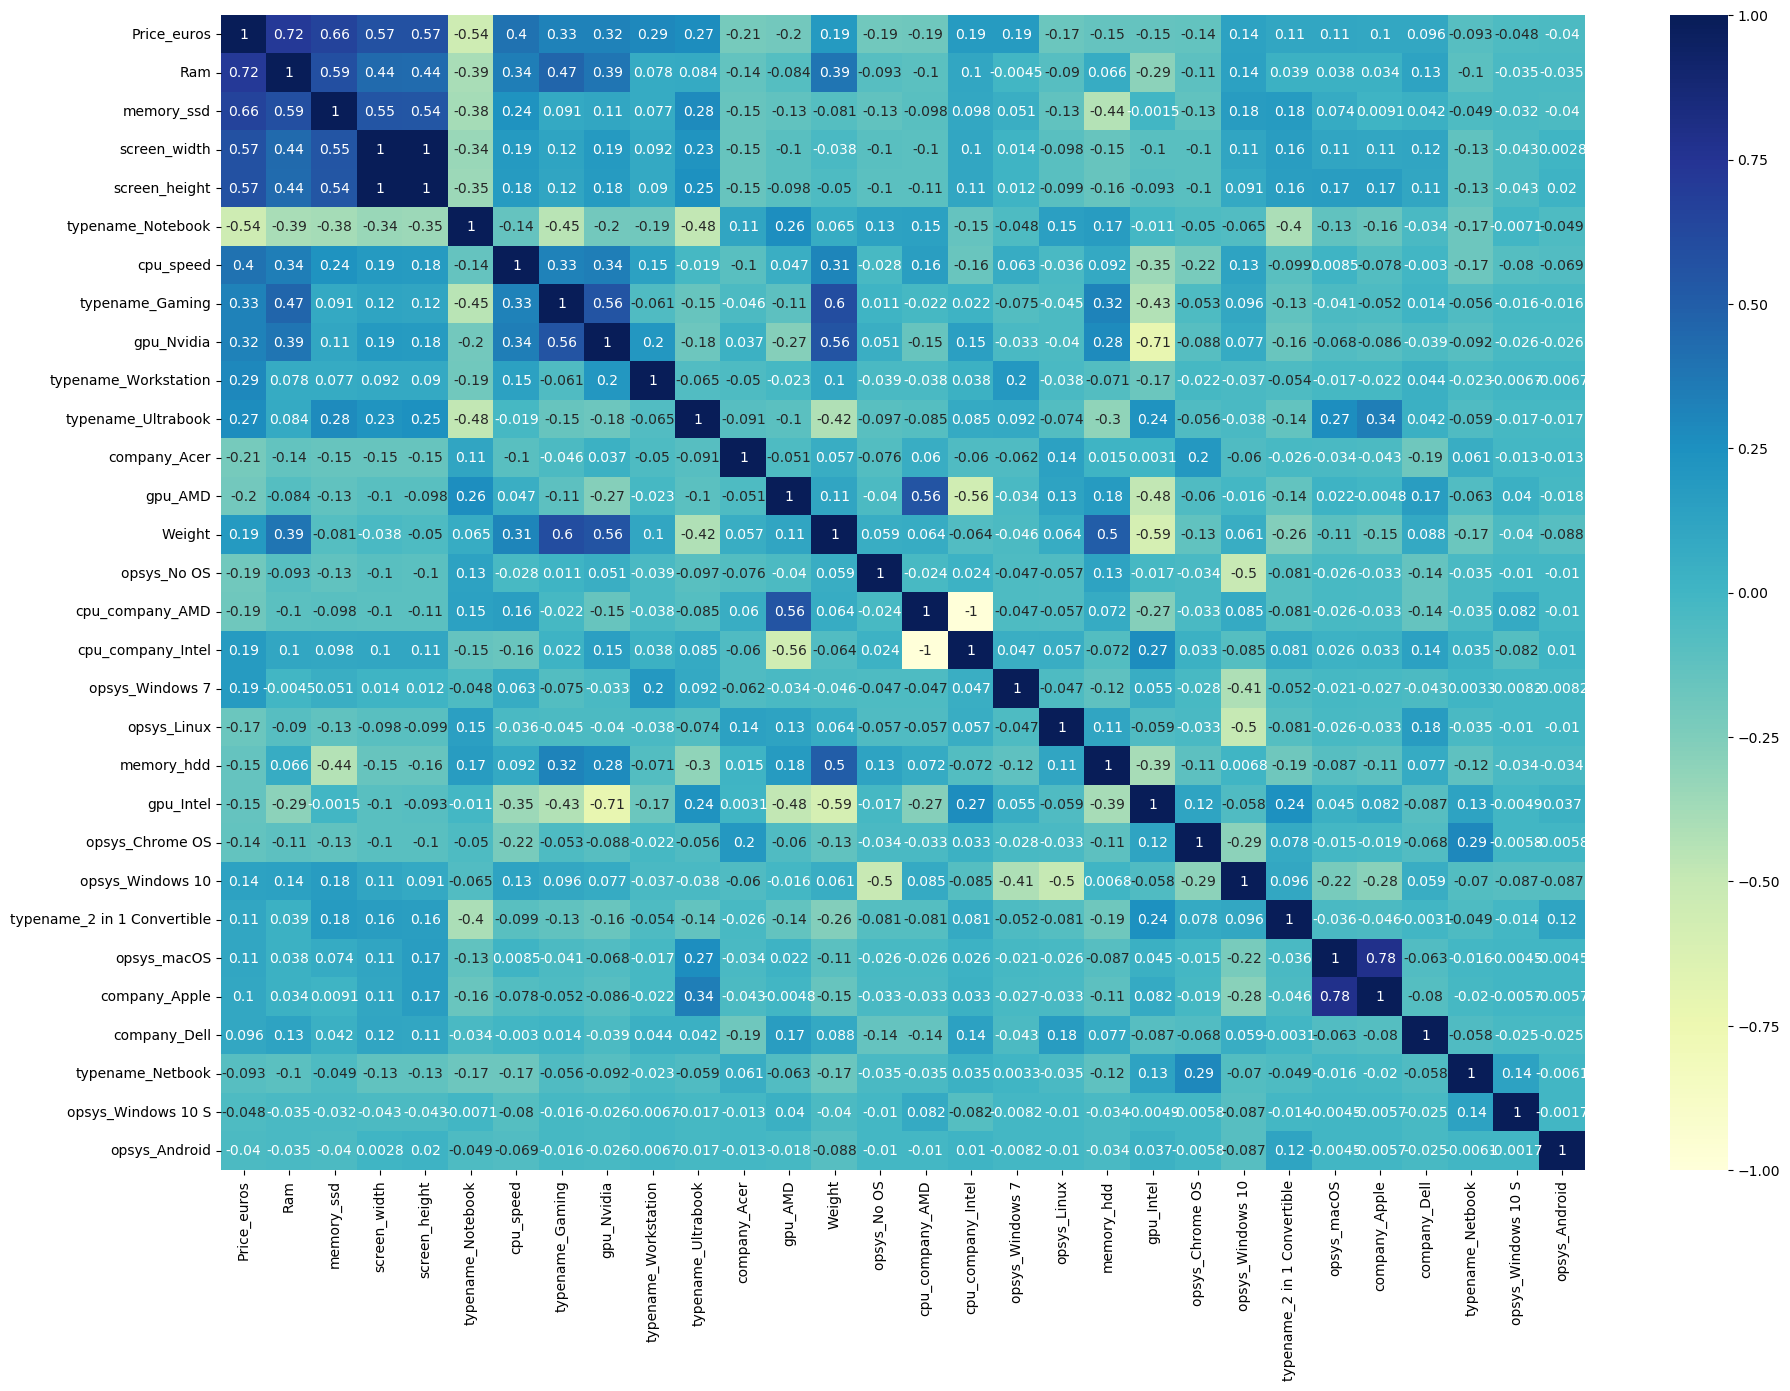

In [36]:
plt.figure(figsize=(22,15))
sns.heatmap(selected_df.corr(),annot=True,cmap=plt.cm.YlGnBu)
plt.plot()

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [38]:
x,y=selected_df.drop('Price_euros',axis=1),selected_df['Price_euros']

In [39]:
x

,Ram,memory_ssd,screen_width,screen_height,typename_Notebook,cpu_speed,typename_Gaming,gpu_Nvidia,typename_Workstation,typename_Ultrabook,...,gpu_Intel,opsys_Chrome OS,opsys_Windows 10,typename_2 in 1 Convertible,opsys_macOS,company_Apple,company_Dell,typename_Netbook,opsys_Windows 10 S,opsys_Android
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,8,128.0,2560,1600,0,2.3,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
2,8,0.0,1440,900,0,1.8,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,8,256.0,1920,1080,1,2.5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,16,512.0,2880,1800,0,2.7,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
5,8,256.0,2560,1600,0,3.1,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,4,128.0,1920,1080,0,2.5,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
1317,16,512.0,3200,1800,0,2.5,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
1318,2,0.0,1366,768,1,1.6,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,shuffle=True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((977, 29), (173, 29), (977,), (173,))

In [41]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test_transform=scalar.transform(x_test)

# XGB REGRESSOR MODEL

In [42]:
regressor=XGBRegressor()
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [43]:
regressor.score(x_test_transform,y_test)

0.8309715794140383

[]

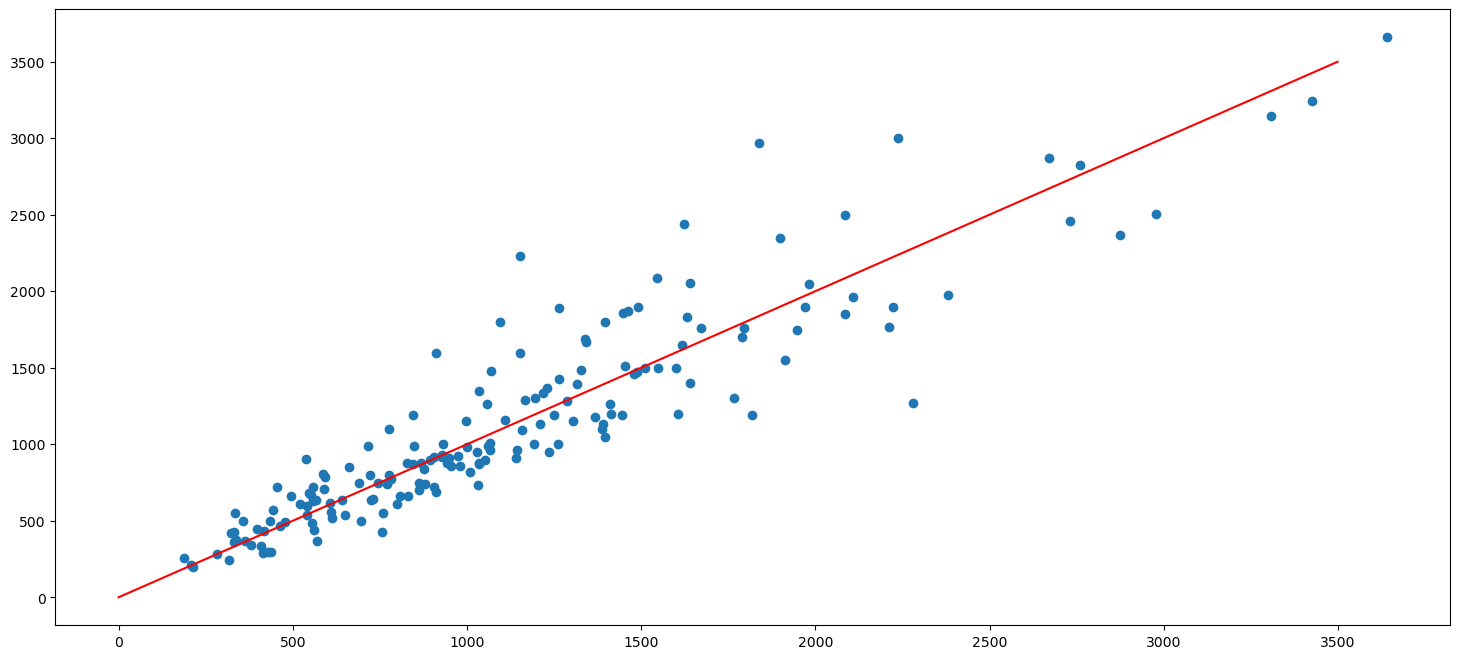

In [44]:
y_pred=regressor.predict(x_test_transform)
plt.figure(figsize=(18,8))
plt.scatter(y_pred,y_test)
plt.plot(np.arange(0,3500),np.arange(0,3500),c='red')
plt.plot()

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

R^2: 0.83
RMSE: 276.57
MAE: 191.01


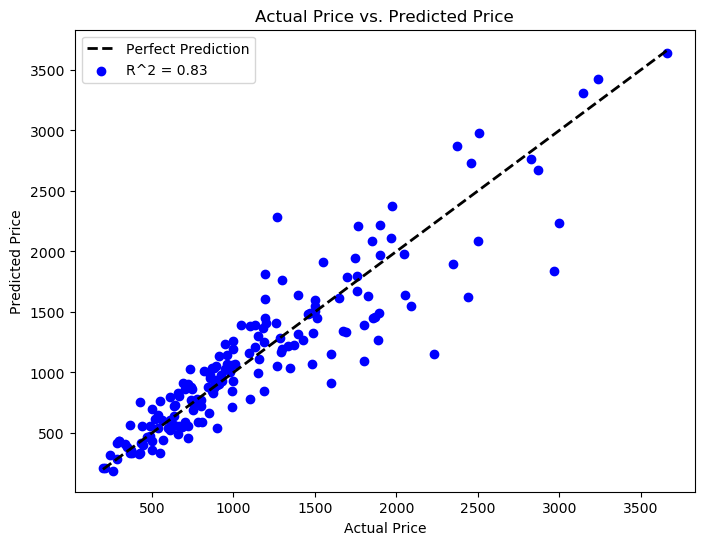

In [46]:
# Generate some example actual and predicted values
actual_values = y_test.values
predicted_values = regressor.predict(x_test_transform)
#Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, c='b', marker='o')

r2 = regressor.score(x_test_transform, y_test)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)
# Set labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')


plt.legend(['Perfect Prediction', f'R^2 = {r2:.2f}', f'RMSE = {rmse:.2f}', f'MAE = {mae:.2f}'])

print(f'R^2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
# Show the plot
plt.show()

# LASSO REGRESSION MODEL

In [47]:
from sklearn.linear_model import Lasso

In [48]:
lasso = Lasso(alpha=0.1, max_iter=10000)  # You can adjust the alpha parameter
lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [49]:
lasso.score(x_test_transform,y_test)

0.7809176623076446

No handles with labels found to put in legend.


R^2: 0.78
RMSE: 314.87
MAE: 236.88


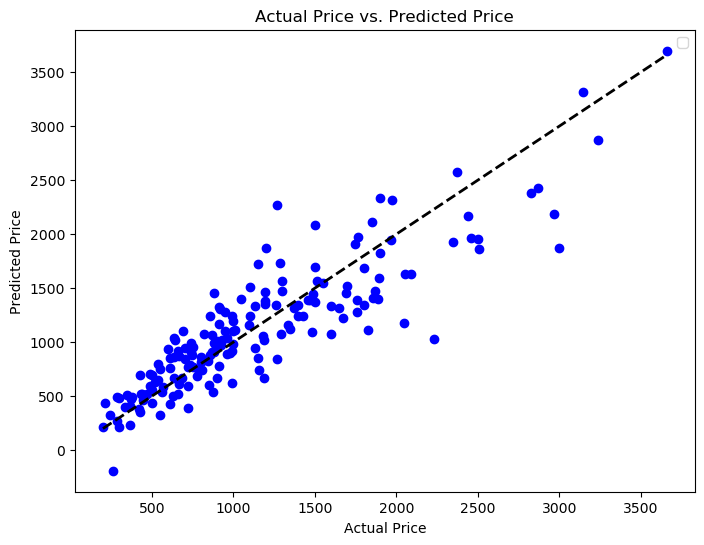

In [50]:
# Generate some example actual and predicted values
actual_values = y_test.values
predicted_values = lasso.predict(x_test_transform)
#Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, c='b', marker='o')

r2 = lasso.score(x_test_transform, y_test)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)
# Set labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')

plt.legend(['Perfect Prediction', f'R^2 = {r2:.2f}', f'RMSE = {rmse:.2f}', f'MAE = {mae:.2f}'])

print(f'R^2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
# Add a legend
plt.legend()

# Show the plot
plt.show()

# LINEAR REGRESSION MODEL

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [53]:
linear.score(x_test_transform,y_test)

0.7816167927501958

R^2: 0.78
RMSE: 314.36
MAE: 235.12


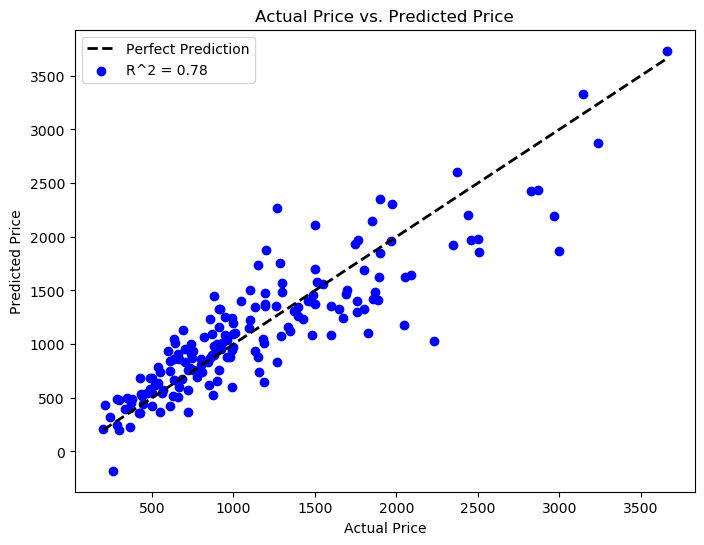

In [54]:
# Generate some example actual and predicted values
actual_values = y_test.values
predicted_values = linear.predict(x_test_transform)
#Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, c='b', marker='o')

r2 = linear.score(x_test_transform, y_test)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)
# Set labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')
plt.legend(['Perfect Prediction', f'R^2 = {r2:.2f}', f'RMSE = {rmse:.2f}', f'MAE = {mae:.2f}'])

print(f'R^2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
# Show the plot
plt.show()

# RANDOM FOREST MODEL

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state= 42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [57]:
rf_model.score(x_test_transform, y_test)

0.8258152627518676

No handles with labels found to put in legend.


R^2: 0.83
RMSE: 280.75
MAE: 199.26


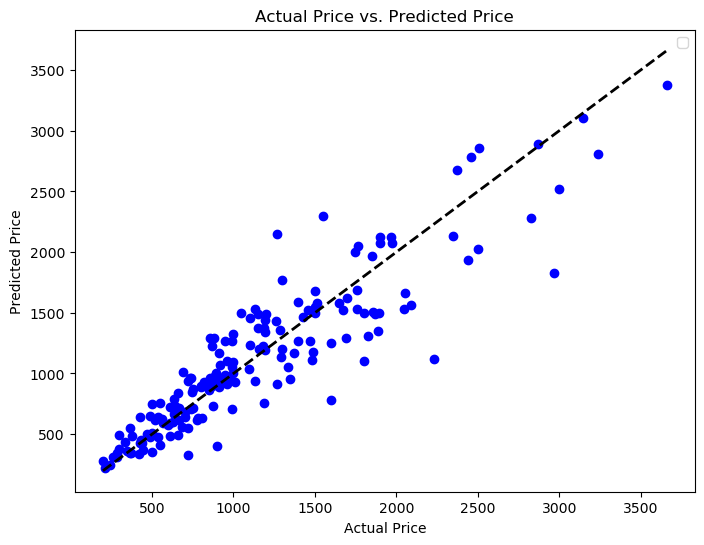

In [58]:
# Generate some example actual and predicted values
actual_values = y_test.values
predicted_values = rf_model.predict(x_test_transform)
#Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, c='b', marker='o')

r2 = rf_model.score(x_test_transform, y_test)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)
# Set labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')

plt.legend(['Perfect Prediction', f'R^2 = {r2:.2f}', f'RMSE = {rmse:.2f}', f'MAE = {mae:.2f}'])

print(f'R^2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
# Add a legend
plt.legend()

# Show the plot
plt.show()

In [64]:
rfpre = rf_model.predict(x_test_transform)

In [65]:
x_test_transform

array([[ 2.96604099e-03,  4.29046991e-01,  2.65202677e+00, ...,
        -1.37002013e-01, -4.52910814e-02, -3.20092200e-02],
       [ 1.65886435e+00,  4.52400734e+00,  1.36464833e+00, ...,
        -1.37002013e-01, -4.52910814e-02, -3.20092200e-02],
       [ 2.96604099e-03, -9.35939793e-01, -1.03711708e+00, ...,
        -1.37002013e-01, -4.52910814e-02, -3.20092200e-02],
       ...,
       [ 2.96604099e-03, -9.35939793e-01,  7.72698838e-02, ...,
        -1.37002013e-01, -4.52910814e-02, -3.20092200e-02],
       [ 8.30915196e-01, -9.35939793e-01, -1.03711708e+00, ...,
        -1.37002013e-01, -4.52910814e-02, -3.20092200e-02],
       [-8.24983114e-01,  2.38165395e-02,  7.72698838e-02, ...,
        -1.37002013e-01, -4.52910814e-02, -3.20092200e-02]])

In [66]:
x_test

,Ram,memory_ssd,screen_width,screen_height,typename_Notebook,cpu_speed,typename_Gaming,gpu_Nvidia,typename_Workstation,typename_Ultrabook,...,gpu_Intel,opsys_Chrome OS,opsys_Windows 10,typename_2 in 1 Convertible,opsys_macOS,company_Apple,company_Dell,typename_Netbook,opsys_Windows 10 S,opsys_Android
laptop_ID,,,,,,,,,,,,,,,,,,,,,
644,8,256.0,3200,1800,0,1.6,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
194,16,1024.0,2560,1440,0,2.7,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
1219,8,0.0,1366,768,1,2.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
37,4,0.0,1366,768,1,2.7,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1156,16,512.0,2560,1440,0,2.6,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,8,256.0,1920,1080,0,2.7,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
667,32,512.0,3840,2160,0,2.8,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
284,8,0.0,1920,1080,1,1.8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
x_test["prediction"] = rfpre

In [69]:
x_test

,Ram,memory_ssd,screen_width,screen_height,typename_Notebook,cpu_speed,typename_Gaming,gpu_Nvidia,typename_Workstation,typename_Ultrabook,...,opsys_Chrome OS,opsys_Windows 10,typename_2 in 1 Convertible,opsys_macOS,company_Apple,company_Dell,typename_Netbook,opsys_Windows 10 S,opsys_Android,prediction
laptop_ID,,,,,,,,,,,,,,,,,,,,,
644,8,256.0,3200,1800,0,1.6,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1493.248125
194,16,1024.0,2560,1440,0,2.7,0,0,0,0,...,0,1,1,0,0,0,0,0,0,2279.796999
1219,8,0.0,1366,768,1,2.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,598.957828
37,4,0.0,1366,768,1,2.7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,552.794891
1156,16,512.0,2560,1440,0,2.6,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1932.932273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,8,256.0,1920,1080,0,2.7,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1495.487227
667,32,512.0,3840,2160,0,2.8,1,1,0,0,...,0,1,0,0,0,1,0,0,0,3102.730000
284,8,0.0,1920,1080,1,1.8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,867.415122


In [70]:
x_test['prediction']

laptop_ID
644     1493.248125
194     2279.796999
1219     598.957828
37       552.794891
1156    1932.932273
           ...     
96      1495.487227
667     3102.730000
284      867.415122
595      488.798362
884      965.520126
Name: prediction, Length: 173, dtype: float64

# GRADIENT BOOSTING MODEL

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [61]:
gb_regressor.score(x_test_transform, y_test)

0.8272746498170134

No handles with labels found to put in legend.


R^2: 0.83
RMSE: 279.58
MAE: 198.68


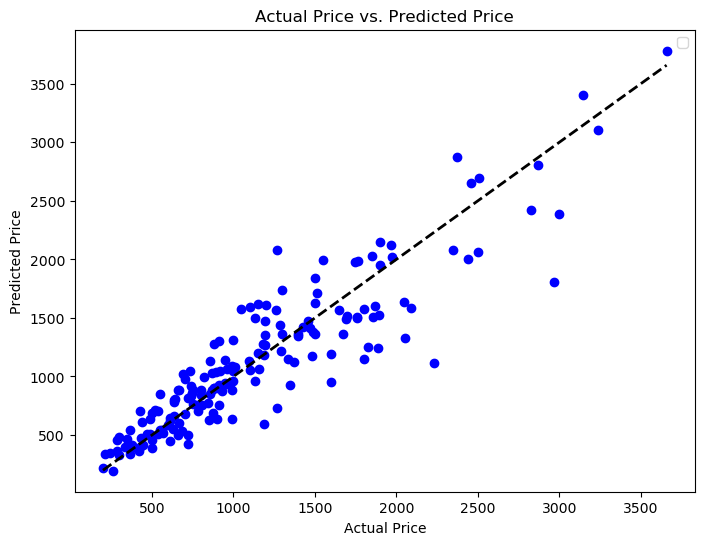

In [62]:
# Generate some example actual and predicted values
actual_values = y_test.values
predicted_values = gb_regressor.predict(x_test_transform)

# Calculate RMSE, MAE, and MSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, c='b', marker='o')

r2 = gb_regressor.score(x_test_transform, y_test)

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)

# Set labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')

plt.legend(['Perfect Prediction', f'R^2 = {r2:.2f}', f'RMSE = {rmse:.2f}', f'MAE = {mae:.2f}'])

print(f'R^2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
# Add a legend
plt.legend()

# Show the plot
plt.show()

In [83]:
df1 = pd.read_csv('../DATA/laptops_pricing.csv', encoding='latin-1', index_col = 'laptop_ID')
df1

In [86]:
df2 = pd.read_csv('../DATA/laptops_pricing.csv', encoding='latin-1', index_col = 'laptop_ID')

In [87]:
df1.drop('Product', axis = 1, inplace = True)

In [88]:
df2.drop('Product', axis = 1, inplace = True)

In [89]:
df1

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1317,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1318,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00


In [90]:
df2

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1317,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1318,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00


In [92]:
selected_features1 = ('Apple', 'HP', 'Acer', 'Dell', 'Lenovo', 'Asus')
df1 = df1[df1['Company'].isin(selected_features1)]

In [94]:
df1['Weight'] = df1['Weight'].str.replace('kg','')
df1['Weight'] = df1['Weight'].astype("float")

C:\Users\britn\anaconda3\envs\iod\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
df1

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1317,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1318,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00


In [97]:
df1['Price_euros'] = df1['Price_euros'].astype(int)

C:\Users\britn\anaconda3\envs\iod\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
df1

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803
...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638
1317,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499
1318,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229


In [100]:
df1=pd.concat([df1,pd.get_dummies(df1['Company'],prefix="company")],axis=1)
df1=df1.drop('Company',axis=1)
df1.head(1)

,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,company_Dell,company_HP,company_Lenovo
laptop_ID,,,,,,,,,,,,,,,,
1,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,1,0,0,0,0


In [101]:
df1=pd.concat([df1,pd.get_dummies(df1["TypeName"],prefix='typename')],axis=1)
df1=df1.drop("TypeName",axis=1)
df1.head(1)

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,...,company_Asus,company_Dell,company_HP,company_Lenovo,typename_2 in 1 Convertible,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,...,0,0,0,0,0,0,0,0,1,0


In [102]:
df1['ScreenResolution']=df1['ScreenResolution'].str.split(' ').apply(lambda x:x[-1])
df1['screen_width']=df1['ScreenResolution'].str.split('x').apply(lambda x:int(x[0]))
df1['screen_height']=df1['ScreenResolution'].str.split('x').apply(lambda x: int(x[1]))
df1=df1.drop('ScreenResolution',axis=1)
df1.head(1)

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,...,company_HP,company_Lenovo,typename_2 in 1 Convertible,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,1,...,0,0,0,0,0,0,1,0,2560,1600


In [103]:
df1['cpu_company']=df1['Cpu'].str.split(' ').apply(lambda x:x[0])
df1['cpu_speed']=df1['Cpu'].str.split(' ').apply(lambda x:x[-1])
df1=df1.drop('Cpu',axis=1)
df1.head(1)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,...,typename_2 in 1 Convertible,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height,cpu_company,cpu_speed
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,1,0,...,0,0,0,0,1,0,2560,1600,Intel,2.3GHz


In [104]:
pd.get_dummies(df1['cpu_company'],prefix='cpu_company')

,cpu_company_AMD,cpu_company_Intel
laptop_ID,,
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
1316,0,1
1317,0,1
1318,0,1


In [105]:
df1=pd.concat([df1,pd.get_dummies(df1['cpu_company'],prefix='cpu_company')],axis=1)
df1=df1.drop('cpu_company',axis=1)
df1.head(1)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,...,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height,cpu_speed,cpu_company_AMD,cpu_company_Intel
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,1,0,...,0,0,0,1,0,2560,1600,2.3GHz,0,1


In [106]:
df1['cpu_speed']=df1['cpu_speed'].apply(lambda x:float(x[:-3]))
df1.head(1)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,...,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height,cpu_speed,cpu_company_AMD,cpu_company_Intel
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,1,0,...,0,0,0,1,0,2560,1600,2.3,0,1


In [107]:
df1['Ram']=df1['Ram'].apply(lambda x:int(x[:-2]))
df1.head(1)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,...,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,screen_width,screen_height,cpu_speed,cpu_company_AMD,cpu_company_Intel
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,1,0,...,0,0,0,1,0,2560,1600,2.3,0,1


In [110]:
def func(x,type:str):
    lis=[]
    x=x.split('+')
    for storage in x:
        temp=storage.split(' ')
        for i in range(len(temp)):
            if temp[i]==type:
                return temp[i-1]
    return "0GB"
df1['memory_ssd']=df1['Memory'].apply(func,args=['SSD'])
df1['memory_hdd']=df1['Memory'].apply(func,args=['HDD'])
df1['memory_flash']=df1['Memory'].apply(func,args=['Flash'])
df1['memory_hybrid']=df1['Memory'].apply(func,args=['Hybrid'])

In [111]:
def func(x):
    if x[-2:]=='TB':
        return float(x[:-2])*1024
    else:
        return float(x[:-2])
for memory_type in ['memory_ssd','memory_hdd','memory_flash','memory_hybrid']:
    df1[memory_type]=df1[memory_type].apply(func)
df1=df1.drop('Memory',axis=1)
df1.head(1)

,Inches,Ram,Gpu,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,company_Dell,...,typename_Workstation,screen_width,screen_height,cpu_speed,cpu_company_AMD,cpu_company_Intel,memory_ssd,memory_hdd,memory_flash,memory_hybrid
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339,0,1,0,0,...,0,2560,1600,2.3,0,1,128.0,0.0,0.0,0.0


In [113]:
df1['Gpu']=df1['Gpu'].str.split(' ').apply(lambda x:x[0])
df1['Gpu'].value_counts()

Intel     642
Nvidia    329
AMD       179
Name: Gpu, dtype: int64

In [114]:
df1=pd.concat([df1,pd.get_dummies(df1['Gpu'],prefix='gpu')],axis=1)
df1=df1.drop('Gpu',axis=1)
df1.head(1)

,Inches,Ram,OpSys,Weight,Price_euros,company_Acer,company_Apple,company_Asus,company_Dell,company_HP,...,cpu_speed,cpu_company_AMD,cpu_company_Intel,memory_ssd,memory_hdd,memory_flash,memory_hybrid,gpu_AMD,gpu_Intel,gpu_Nvidia
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8,macOS,1.37,1339,0,1,0,0,0,...,2.3,0,1,128.0,0.0,0.0,0.0,0,1,0


In [115]:
df1=pd.concat([df1,pd.get_dummies(df1['OpSys'],prefix='opsys')],axis=1)
df1=df1.drop('OpSys',axis=1)
df1.head(1)

,Inches,Ram,Weight,Price_euros,company_Acer,company_Apple,company_Asus,company_Dell,company_HP,company_Lenovo,...,gpu_Nvidia,opsys_Android,opsys_Chrome OS,opsys_Linux,opsys_Mac OS X,opsys_No OS,opsys_Windows 10,opsys_Windows 10 S,opsys_Windows 7,opsys_macOS
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8,1.37,1339,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [116]:
df1

,Inches,Ram,Weight,Price_euros,company_Acer,company_Apple,company_Asus,company_Dell,company_HP,company_Lenovo,...,gpu_Nvidia,opsys_Android,opsys_Chrome OS,opsys_Linux,opsys_Mac OS X,opsys_No OS,opsys_Windows 10,opsys_Windows 10 S,opsys_Windows 7,opsys_macOS
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8,1.37,1339,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,13.3,8,1.34,898,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,15.6,8,1.86,575,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,15.4,16,1.83,2537,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,13.3,8,1.37,1803,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,14.0,4,1.80,638,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1317,13.3,16,1.30,1499,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1318,14.0,2,1.50,229,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [117]:
max_corr=df1.corr()['Price_euros'].apply(lambda x:abs(x)).sort_values(ascending=False,axis=0)
max_corr.iloc[:25]

Price_euros                    1.000000
Ram                            0.716222
memory_ssd                     0.659107
screen_width                   0.571991
screen_height                  0.571864
typename_Notebook              0.544706
cpu_speed                      0.404425
typename_Gaming                0.327953
gpu_Nvidia                     0.320448
typename_Workstation           0.290383
typename_Ultrabook             0.271252
company_Acer                   0.212280
gpu_AMD                        0.198427
Weight                         0.192029
opsys_No OS                    0.187533
cpu_company_AMD                0.185308
cpu_company_Intel              0.185308
opsys_Windows 7                0.185100
opsys_Linux                    0.165124
memory_hdd                     0.147300
gpu_Intel                      0.146771
opsys_Chrome OS                0.140302
opsys_Windows 10               0.139599
typename_2 in 1 Convertible    0.108644
opsys_macOS                    0.107803


In [118]:
max_corr_cols=max_corr.iloc[:30].index
max_corr_cols

Index(['Price_euros', 'Ram', 'memory_ssd', 'screen_width', 'screen_height',
       'typename_Notebook', 'cpu_speed', 'typename_Gaming', 'gpu_Nvidia',
       'typename_Workstation', 'typename_Ultrabook', 'company_Acer', 'gpu_AMD',
       'Weight', 'opsys_No OS', 'cpu_company_AMD', 'cpu_company_Intel',
       'opsys_Windows 7', 'opsys_Linux', 'memory_hdd', 'gpu_Intel',
       'opsys_Chrome OS', 'opsys_Windows 10', 'typename_2 in 1 Convertible',
       'opsys_macOS', 'company_Apple', 'company_Dell', 'typename_Netbook',
       'opsys_Windows 10 S', 'opsys_Android'],
      dtype='object')

In [119]:
df1=df1[max_corr_cols]
df1

,Price_euros,Ram,memory_ssd,screen_width,screen_height,typename_Notebook,cpu_speed,typename_Gaming,gpu_Nvidia,typename_Workstation,...,gpu_Intel,opsys_Chrome OS,opsys_Windows 10,typename_2 in 1 Convertible,opsys_macOS,company_Apple,company_Dell,typename_Netbook,opsys_Windows 10 S,opsys_Android
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,1339,8,128.0,2560,1600,0,2.3,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,898,8,0.0,1440,900,0,1.8,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,575,8,256.0,1920,1080,1,2.5,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2537,16,512.0,2880,1800,0,2.7,0,0,0,...,0,0,0,0,1,1,0,0,0,0
5,1803,8,256.0,2560,1600,0,3.1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,638,4,128.0,1920,1080,0,2.5,0,0,0,...,1,0,1,1,0,0,0,0,0,0
1317,1499,16,512.0,3200,1800,0,2.5,0,0,0,...,1,0,1,1,0,0,0,0,0,0
1318,229,2,0.0,1366,768,1,1.6,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [120]:
df1.shape

(1150, 30)

In [124]:
x1,y1=df1.drop('Price_euros',axis=1),selected_df['Price_euros']

In [126]:
x1

,Ram,memory_ssd,screen_width,screen_height,typename_Notebook,cpu_speed,typename_Gaming,gpu_Nvidia,typename_Workstation,typename_Ultrabook,...,gpu_Intel,opsys_Chrome OS,opsys_Windows 10,typename_2 in 1 Convertible,opsys_macOS,company_Apple,company_Dell,typename_Netbook,opsys_Windows 10 S,opsys_Android
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,8,128.0,2560,1600,0,2.3,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
2,8,0.0,1440,900,0,1.8,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,8,256.0,1920,1080,1,2.5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,16,512.0,2880,1800,0,2.7,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
5,8,256.0,2560,1600,0,3.1,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,4,128.0,1920,1080,0,2.5,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
1317,16,512.0,3200,1800,0,2.5,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
1318,2,0.0,1366,768,1,1.6,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [129]:
scaler = StandardScaler()

x1_scaled = scaler.fit_transform(x1)

In [130]:
x1_scaled

array([[-0.02267323, -0.26003123,  1.34709669, ..., -0.14599448,
        -0.04173919, -0.04173919],
       [-0.02267323, -0.94692732, -0.89305543, ..., -0.14599448,
        -0.04173919, -0.04173919],
       [-0.02267323,  0.42686485,  0.06700977, ..., -0.14599448,
        -0.04173919, -0.04173919],
       ...,
       [-1.24490199, -0.94692732, -1.04106548, ..., -0.14599448,
        -0.04173919, -0.04173919],
       [-0.43008282, -0.94692732, -1.04106548, ..., -0.14599448,
        -0.04173919, -0.04173919],
       [-0.8374924 , -0.94692732, -1.04106548, ..., -0.14599448,
        -0.04173919, -0.04173919]])

In [133]:
x1_pred = rf_model.predict(x1_scaled)

In [134]:
x1['predicted'] = x1_pred

In [135]:
x1

,Ram,memory_ssd,screen_width,screen_height,typename_Notebook,cpu_speed,typename_Gaming,gpu_Nvidia,typename_Workstation,typename_Ultrabook,...,opsys_Chrome OS,opsys_Windows 10,typename_2 in 1 Convertible,opsys_macOS,company_Apple,company_Dell,typename_Netbook,opsys_Windows 10 S,opsys_Android,predicted
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,8,128.0,2560,1600,0,2.3,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1482.299956
2,8,0.0,1440,900,0,1.8,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1099.708722
3,8,256.0,1920,1080,1,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,785.946131
4,16,512.0,2880,1800,0,2.7,0,0,0,1,...,0,0,0,1,1,0,0,0,0,2372.429188
5,8,256.0,2560,1600,0,3.1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1744.288001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,4,128.0,1920,1080,0,2.5,0,0,0,0,...,0,1,1,0,0,0,0,0,0,708.385957
1317,16,512.0,3200,1800,0,2.5,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1693.406815
1318,2,0.0,1366,768,1,1.6,0,0,0,0,...,0,1,0,0,0,0,0,0,0,245.863951


In [136]:
x1['predicted']

laptop_ID
1       1482.299956
2       1099.708722
3        785.946131
4       2372.429188
5       1744.288001
           ...     
1316     708.385957
1317    1693.406815
1318     245.863951
1319     707.683925
1320     345.015274
Name: predicted, Length: 1150, dtype: float64

In [138]:
df2['predicted'] = x1['predicted']

In [139]:
df2

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,predicted
laptop_ID,,,,,,,,,,,,
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,1482.299956
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1099.708722
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,785.946131
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2372.429188
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,1744.288001
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,708.385957
1317,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,1693.406815
1318,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,245.863951


In [143]:
df2.groupby(['Company','Price_euros']).mean()

Inches   predicted
Company Price_euros                    
Acer    174.00         11.6  214.619683
        199.00         15.6  281.087493
        209.00         15.6  283.115958
        269.00         11.6  352.793004
        272.00         15.6  356.613088
...                     ...         ...
Vero    260.00         14.0         NaN
Xiaomi  935.00         13.3         NaN
        999.90         13.3         NaN
        1199.00        15.6         NaN
        1399.95        15.6         NaN

[1086 rows x 2 columns]

In [144]:
df2.groupby('Company')['predicted'].mean()

Company
Acer          675.537020
Apple        1560.038938
Asus         1125.321626
Chuwi                NaN
Dell         1180.830246
Fujitsu              NaN
Google               NaN
HP           1029.360486
Huawei               NaN
LG                   NaN
Lenovo       1064.486156
MSI                  NaN
Mediacom             NaN
Microsoft            NaN
Razer                NaN
Samsung              NaN
Toshiba              NaN
Vero                 NaN
Xiaomi               NaN
Name: predicted, dtype: float64

In [ ]:
df2.Price_euros.mean()

In [145]:
df2.groupby('Company')['Price_euros'].mean()

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [147]:
rf_model.score(x1_scaled, y)

0.9096011539010324

In [ ]:
# Generate some example actual and predicted values
actual_values = y.values
predicted_values = rf_model.predict(x_test_transform)
#Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, c='b', marker='o')

r2 = rf_model.score(x_test_transform, y_test)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)
# Set labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')

plt.legend(['Perfect Prediction', f'R^2 = {r2:.2f}', f'RMSE = {rmse:.2f}', f'MAE = {mae:.2f}'])

print(f'R^2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
# Add a legend
plt.legend()

# Show the plot
plt.show()